# Specify parameters

In [73]:
# Experiment Parameters
exp_name = "cxix29016"
run_num = 134
det_name = "DsaCsPad"
photon_energy = 6000. # In eV
user_name="yashas"

# Y limit
"""
If y_range == "auto" : The diagram will show the full range
If y_range == [lower, upper] : The diagram will show only that region
"""
#y_range = [-0.1, 5000]
y_range = "auto"

# Calculation for radial distributions

The powder file to visualize is:
/reg/d/psdm/cxi/cxix29016/scratch/yashas/psocake/r0134/cxix29016_0134_DsaCsPad_var.npy


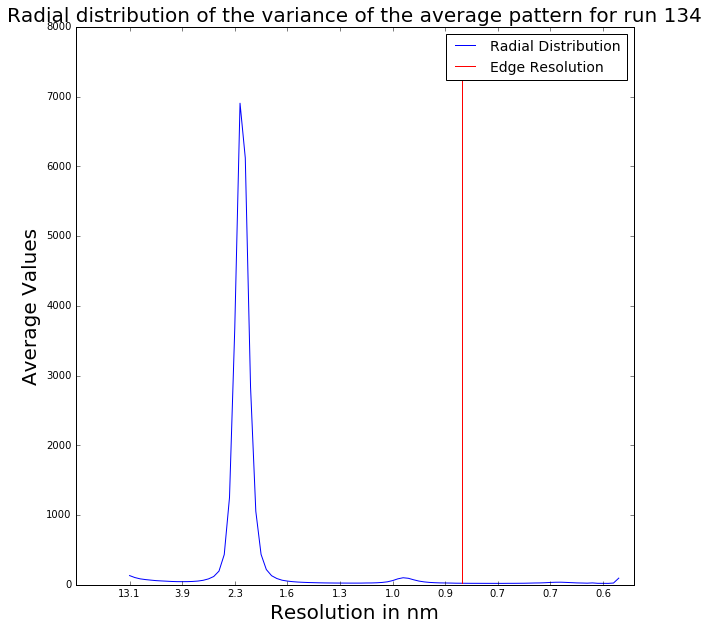

In [76]:
################################################################################################################################
# Obtain the powder file address
powder_file = "/reg/d/psdm/cxi/{}/scratch/{}/psocake/r{:04d}/{}_{:04d}_{}_var.npy".format(exp_name, 
                                                                                         user_name,
                                                                                         run_num,
                                                                                         exp_name,
                                                                                         run_num,
                                                                                         det_name)

#powder_file = "/reg/d/psdm/cxi/cxix29016/scratch/yashas/psocake/r0158/psocake_cxix29016_158_DsaCsPad_0_1527946207_446357065_100116_unassembled.npy"

print("The powder file to visualize is:")
print(powder_file)

################################################################################################################################
# Load Modules

# Append Haoyuan Li's source folder for this script
import sys
#sys.path.append("/reg/d/psdm/cxi/cxilr7416/scratch/haoyuan/src/")

# Load standard modules
import numpy as np
import matplotlib.pyplot as plt
import psana

# Load Haoyuan's modules for this scripts
import tmp_module 

%matplotlib inline
################################################################################################################################
# Initialize detector
ds = psana.DataSource('exp={}:run={}:idx'.format(exp_name, run_num))
run = ds.runs().next()    
times = run.times()
env = ds.env()
det = psana.Detector(det_name, env)

################################################################################################################################
# Initialize the visualization
# Visualization Parameters
number_of_interval = 100
radial_range = "auto"

# Initialize
(category_map, momentum_length_map, 
 momentum_steps , p_correction, g_correction )= tmp_module.wrapper_get_pixel_map(
                                                                     detector=det,
                                                                     run_num=run_num,
                                                                     photon_energy = photon_energy,
                                                                     number_of_interval=number_of_interval,
                                                                     radial_range=radial_range,
                                                                     )
# Get critical resolution stage.
corner_momentum = np.max(momentum_length_map)
edge_momentum = corner_momentum/ np.sqrt(2)

# Correction
correction = (1 / p_correction) /g_correction

# Resolution conversion
resolution_step = 2*np.pi/ momentum_steps * 10**9 # In nm
resolution_step = ["{:.1f}".format(x) for x in resolution_step]
################################################################################################################################
# Load the powder pattern and Calculate the radial distribution

powder_pattern = np.load(powder_file)
#powder_pattern *= correction

distribution_holder = tmp_module.get_radial_distribution(powder_pattern, category_map, number_of_interval)

#This gets rid of the low q data without having to do anything
momentum_steps = momentum_steps[6:]
distribution_holder = distribution_holder[6:]        
################################################################################################################################
# Show the radial distribution

y_lim = [np.min(distribution_holder), np.max(distribution_holder)*1.1]

fig, axes = plt.subplots(1, 1, sharex=True, sharey=True)
fig.set_size_inches((10,10))

# Show the plot
axes.plot(momentum_steps, distribution_holder)

# Draw the edge position
if y_range == "auto":
    axes.plot([edge_momentum, edge_momentum],y_lim,"r")
else:
    axes.plot([edge_momentum, edge_momentum],y_range,"r")
        
# Set parameters
axes.set_title("Radial distribution of the variance of the average pattern for run {}".format(run_num),fontsize=20)
axes.set_xlabel("Resolution in nm", fontsize=20)
axes.set_ylabel("Average Values", fontsize=20)

# Set the figure y range
if y_range == "auto":
    pass
else:
    axes.set_ylim(y_range)
    
axes.set_xticks(momentum_steps[::10])
axes.set_xticklabels(resolution_step[::10])
        
# Only attach the legend to the last subfigure
axes.legend(["Radial Distribution","Edge Resolution"], fontsize=14)

# Show the result
plt.show()